# Pipeline Construction

In [22]:
from dao import DataAccess

In [23]:
# Loading Data
import operator

X = DataAccess.get_as_dataframe()
y = X["labels"].apply(operator.itemgetter("alcohol"))

In [24]:
X.head()

,created_at,labels,predict,text,user
_id,,,,,
556e0ee3d6dfbb462880f0a5,Tue Jun 02 20:16:08 +0000 2015,{'alcohol': 0},0.526050,Impatiently waiting to get our hands on the ne...,"{'favourites_count': 394, 'friends_count': 199..."
556e128ad6dfbb46288111e4,Tue Jun 02 20:31:44 +0000 2015,"{'first_person': 0, 'raw': 'Alcohol Related::P...",0.516649,Beer fans need their @ColumbusBrewing Bodhi. I...,"{'favourites_count': 806, 'friends_count': 960..."
556e1464d6dfbb4628812330,Tue Jun 02 20:39:37 +0000 2015,{'alcohol': 1},0.502633,Stone Cold use to be the baddest MF in my book...,"{'favourites_count': 860, 'friends_count': 684..."
556e15f1d6dfbb4628813236,Tue Jun 02 20:46:14 +0000 2015,{'alcohol': 1},0.535758,Now @iamjohnoliver has to drink a Bud Light Li...,"{'favourites_count': 3473, 'friends_count': 14..."
556e1adcd6dfbb50e34a1ed6,Tue Jun 02 21:07:13 +0000 2015,{'alcohol': 0},0.533892,I'm ready for a yard sale and to sell all the...,"{'favourites_count': 3964, 'friends_count': 43..."


In [25]:
y.head()

_id
556e0ee3d6dfbb462880f0a5    0
556e128ad6dfbb46288111e4    1
556e1464d6dfbb4628812330    1
556e15f1d6dfbb4628813236    1
556e1adcd6dfbb50e34a1ed6    0
Name: labels, dtype: int64

### Importing Models

We're going to try three standards to build models. `SVM`, `LR`, `RF` to create baselines to beat.

In [5]:
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

#### Importing Pipeline Class 

In [6]:
from pipelines.alcohol import AlcoholPipeline
help(AlcoholPipeline)

Help on class AlcoholPipeline in module pipelines.alcohol:

class AlcoholPipeline(builtins.object)
 |  Methods defined here:
 |  
 |  __init__(self, time_features=None, global_features=None, lsi=False, lsi_n=1000)
 |      :param time_features: default(["dayofweek", "hour", "hourofweek"])
 |      :param lsi: if true, includes the TruncatedSVD() piece
 |  
 |  feature_agepipe(self)
 |      :return: UserAgeMonths
 |  
 |  feature_textpipe(self)
 |      :return: Pipeline(ItemGetter -> TfidfVectorizer -> TruncatedSVD)
 |  
 |  feature_timepipe(self)
 |      :return: Pipeline(ItemGetter -> Timestamp2DatetimeIndex -> DatetimeIndexAttr)
 |  
 |  feature_userpipe(self)
 |      :return: Pipeline(UserGeoVectorizer)
 |  
 |  features(self)
 |      :return: FeatureUnion([
 |          ("text", Pipeline(textpipe)),
 |          ("user", Pipeline(userpipe)),
 |          ("time", Pipeline(timepipe)),
 |          ("age", Pipeline(agepipe)),
 |      ])
 |  
 |  pipeline(self, clf)
 |      :param clf: skle

In [8]:
AlcoholPipeline().pipeline(LogisticRegression()).get_params()

{'clf': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='ovr',
           penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
           verbose=0),
 'clf__C': 1.0,
 'clf__class_weight': None,
 'clf__dual': False,
 'clf__fit_intercept': True,
 'clf__intercept_scaling': 1,
 'clf__max_iter': 100,
 'clf__multi_class': 'ovr',
 'clf__penalty': 'l2',
 'clf__random_state': None,
 'clf__solver': 'liblinear',
 'clf__tol': 0.0001,
 'clf__verbose': 0,
 'exploder': ExplodingRecordJoiner(user=['created_at', 'favourites_count', 'followers_count', 'friends_count', 'statuses_count', 'verified']),
 'features': FeatureUnion(n_jobs=1,
        transformer_list=[('text', Pipeline(steps=[('getter', ItemGetter(key='text')), ('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
         dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
         lowercase=True, max_df=1.0,

#### Metrics

In [28]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from sklearn.cross_validation import train_test_split
from pprint import pprint

def diagnostics(clf, X, y):
    yt = y
    yp = clf.predict(X)
    return dict(
        f1_score = f1_score(yt, yp),
        accuracy_score = accuracy_score(yt, yp),
        precision_score = precision_score(yt, yp),
        recall_score = recall_score(yt, yp)
    )

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [75]:
%%time
clf = AlcoholPipeline().pipeline(LogisticRegression(C=10))
clf.fit(X_train, y_train)

pprint(diagnostics(clf, X_test, y_test))

{'accuracy_score': 0.7694545454545455,
 'f1_score': 0.8214084507042253,
 'precision_score': 0.77718550106609807,
 'recall_score': 0.87096774193548387}
CPU times: user 2.84 s, sys: 14.2 ms, total: 2.85 s
Wall time: 2.85 s


In [80]:
%%time
clf = AlcoholPipeline().pipeline(RandomForestClassifier(
        n_estimators=400,
        max_features=1300,
        n_jobs=4))

clf.fit(X_train, y_train)

pprint(diagnostics(clf, X_test, y_test))

{'accuracy_score': 0.80945454545454543,
 'f1_score': 0.85130533484676518,
 'precision_score': 0.81081081081081086,
 'recall_score': 0.89605734767025091}
CPU times: user 49.5 s, sys: 179 ms, total: 49.7 s
Wall time: 14.7 s


## Generating Train-Test Split and Learning Curves

The code for this comes from [Plotting Learning Curves](http://scikit-learn.org/stable/auto_examples/plot_learning_curve.html) by sklearn.

In [31]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

from sklearn import cross_validation
from sklearn.learning_curve import learning_curve


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and traning learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : integer, cross-validation generator, optional
        If an integer is passed, it is the number of folds (defaults to 3).
        Specific cross-validation objects can be passed, see
        sklearn.cross_validation module for the list of possible objects

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring="accuracy")
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [41]:
cv = cross_validation.ShuffleSplit(
    len(y), n_iter=5, test_size=0.2, random_state=0
)

# Learning Curves

In [33]:
import seaborn as sns

sns.set_style("darkgrid")

#### Logistic Regression

With sufficiently low variance we'll see that without tuning

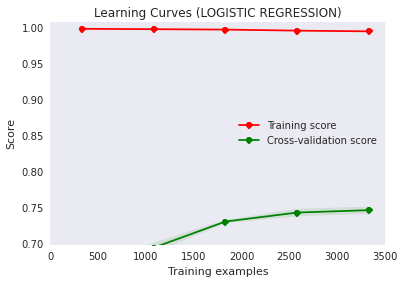

CPU times: user 1.15 s, sys: 200 ms, total: 1.35 s
Wall time: 27.7 s


In [62]:
%%time
title = "Learning Curves (LOGISTIC REGRESSION)"
estimator = AlcoholPipeline().pipeline(LogisticRegression(
        class_weight="auto",
        C=20,
    ))
plot_learning_curve(estimator, title, AlcoholPipeline()._exploder.fit_transform(X), y, (0.7, 1.01), cv=cv, n_jobs=4)
plt.show()

#### LinearSVC

Variance is really high...

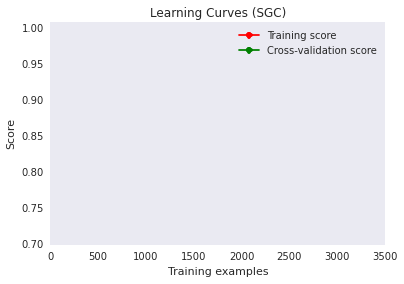

CPU times: user 1.03 s, sys: 172 ms, total: 1.2 s
Wall time: 23.9 s


In [68]:
%%time

from sklearn.linear_model import Perceptron

title = "Learning Curves (SGC)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
estimator = AlcoholPipeline().pipeline(Perceptron())
plot_learning_curve(estimator, title, AlcoholPipeline()._exploder.fit_transform(X), y, (0.7, 1.01), cv=cv, n_jobs=4)
plt.show()

#### RandomForests

Notice how well it gets the training data, I feel like this has the most room to improve.

This is just another one to show that even with a bit of tuning, and falling training score, CV score is still pretty good.

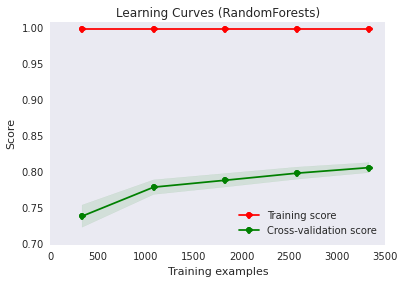

CPU times: user 1.43 s, sys: 251 ms, total: 1.68 s
Wall time: 3min 1s


In [58]:
%%time
title = "Learning Curves (RandomForests)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
estimator = AlcoholPipeline().pipeline(
    RandomForestClassifier(
        n_estimators=400,
        max_features=1000,
        class_weight="auto",
        n_jobs=4)
    )
plot_learning_curve(estimator, title, AlcoholPipeline()._exploder.fit_transform(X), y, (0.7, 1.01), cv=cv, n_jobs=4)
plt.show()